## Problem Statement

Reduce customer churn, telecom companies need to predict which customers are at high risk of churn.
We will analyse customer-level data of a leading telecom firm, build predictive models to identify customers at high risk of churn.
<br><br>
#### Assignemnt Submitted By:
1. Anjan Wahwar <br>
2. Sachinraj C.S. <br>
3. Rakesh Rajkumaran 

### Importing libraries

In [546]:
# Importing Pandas and NumPy
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings
#pd.set_option('display.max_columns', 500)
#pd.set_option('display.max_rows',9999)
warnings.filterwarnings('ignore')

In [633]:
df = pd.read_csv(r'telecom_churn_data.csv')

In [634]:
df.shape

(99999, 226)

Filter the data we required

### Filter high-value customers

In [635]:
df['total_rech_amt_6_7'] = df[['total_rech_amt_6','total_rech_amt_7']].mean(axis=1)
df = df.loc[df['total_rech_amt_6_7']>=np.percentile(df['total_rech_amt_6_7'],70)]

In [636]:
df.shape

(30011, 227)

### Derive new features

This is one of the most important parts of data preparation since good features are often the differentiators between good and bad models. <br>
Adding a new feature to the dataset indicating how much time a customer has spend talking to customer care <br>
If a customer has any issue with the telecom provider he must have complained the same to CC. <br>
Adding a feature called CC_Contacted which will indicate how many times a customer has contacted customer care for any concern.<br>
This should be the count.

In [637]:
df['cc_contacted'] = np.where(((df.loc_og_t2c_mou_6 > 0.0) | (df.loc_og_t2c_mou_7 > 0.0) | (df.loc_og_t2c_mou_8 > 0.0) | (df.loc_og_t2c_mou_9 > 0.0)), 1, 0)

### Tag churners and remove attributes of the churn phase

In [638]:
def churn(col):
    
    if col['total_ic_mou_9']==0 and col['total_og_mou_9']==0 and col['vol_2g_mb_9']==0 and col['vol_3g_mb_9']==0:
        return 1
    else:
        return 0

In [639]:
df['Churned'] =  df.apply (lambda col: churn(col), axis=1)

In [640]:
df.Churned.value_counts()

0    27418
1     2593
Name: Churned, dtype: int64

## Countering Class Imbalace on Dataset

In [641]:
from sklearn.utils import resample
count=df[df.Churned == 0].mobile_number.count()
# Separate majority and minority classes
telecom_majority = df[df.Churned==0]
telecom_minority = df[df.Churned==1]
 
# Upsample minority class
telecom_minority_upsampled = resample(telecom_minority,replace=True,n_samples=int(count*(2/3)),random_state=123)

# Combine majority class with upsampled minority class
df = pd.concat([telecom_majority, telecom_minority_upsampled])
 
# Display new class counts
df.Churned.value_counts()

0    27418
1    18278
Name: Churned, dtype: int64

In [642]:
df.head()
#loc_og_t2c_mou_6	loc_og_t2c_mou_7	loc_og_t2c_mou_8	loc_og_t2c_mou_9

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,total_rech_amt_6_7,cc_contacted,Churned
8,7001524846,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,378.721,492.223,137.362,166.787,413.69,351.03,35.08,33.46,94.66,80.63,136.48,108.71,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,297.13,217.59,12.49,26.13,80.96,70.58,50.54,34.58,0.00,0.00,0.00,0.00,0.0,0.0,7.15,0.0,378.09,288.18,63.04,60.71,116.56,133.43,22.58,7.33,13.69,10.04,75.69,74.13,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,130.26,143.48,98.28,81.46,0.0,0.0,0.00,0.0,0.00,0.00,10.23,0.00,0.00,0.0,0.0,0.0,508.36,431.66,171.56,142.18,23.84,9.84,0.31,4.03,57.58,13.98,15.48,17.34,0.00,0.00,0.00,0.00,81.43,23.83,15.79,21.38,0.00

In [643]:
df.shape

(45696, 229)

### Checking the null values percentage and removing column with moth than 60 percent null values as they do not contribute much

In [644]:
round(100*(df.isnull().sum()/len(df)), 2)

mobile_number            0.00
circle_id                0.00
loc_og_t2o_mou           0.96
std_og_t2o_mou           0.96
loc_ic_t2o_mou           0.96
last_date_of_month_6     0.00
last_date_of_month_7     0.45
last_date_of_month_8     2.43
last_date_of_month_9     5.61
arpu_6                   0.00
arpu_7                   0.00
arpu_8                   0.00
arpu_9                   0.00
onnet_mou_6              2.21
onnet_mou_7              2.74
onnet_mou_8             11.82
onnet_mou_9             25.03
offnet_mou_6             2.21
offnet_mou_7             2.74
offnet_mou_8            11.82
offnet_mou_9            25.03
roam_ic_mou_6            2.21
roam_ic_mou_7            2.74
roam_ic_mou_8           11.82
roam_ic_mou_9           25.03
roam_og_mou_6            2.21
roam_og_mou_7            2.74
roam_og_mou_8           11.82
roam_og_mou_9           25.03
loc_og_t2t_mou_6         2.21
                        ...  
night_pck_user_8        69.92
night_pck_user_9        74.46
monthly_2g

In [645]:
df.fillna(0,inplace=True)

In [646]:
df.shape

(45696, 229)

In [647]:
churn = (sum(df['Churned'])/len(df['Churned'].index))*100
churn

39.999124649859944

In [648]:
df.Churned.value_counts()

0    27418
1    18278
Name: Churned, dtype: int64

### Checking columns that have all values same in its every rows and thus eliminating those columns as they donot contribute to variance in data

In [649]:
df.nunique()

mobile_number           30009
circle_id                   1
loc_og_t2o_mou              1
std_og_t2o_mou              1
loc_ic_t2o_mou              1
last_date_of_month_6        1
last_date_of_month_7        2
last_date_of_month_8        2
last_date_of_month_9        2
arpu_6                  29259
arpu_7                  29259
arpu_8                  28403
arpu_9                  27326
onnet_mou_6             18812
onnet_mou_7             18937
onnet_mou_8             17603
onnet_mou_9             16674
offnet_mou_6            22453
offnet_mou_7            22649
offnet_mou_8            21512
offnet_mou_9            20451
roam_ic_mou_6            4338
roam_ic_mou_7            3649
roam_ic_mou_8            3655
roam_ic_mou_9            3370
roam_og_mou_6            5173
roam_og_mou_7            4431
roam_og_mou_8            4382
roam_og_mou_9            4004
loc_og_t2t_mou_6        11151
                        ...  
night_pck_user_8            2
night_pck_user_9            2
monthly_2g

In [650]:
df = df.loc[:,df.apply(pd.Series.nunique) != 1 ]  #Removing columns having only unique values

In [651]:
df.shape

(45696, 216)

In [652]:
df.head()

,mobile_number,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,total_rech_amt_6_7,cc_contacted,Churned
8,7001524846,7/31/2014,8/31/2014,9/30/2014,378.721,492.223,137.362,166.787,413.69,351.03,35.08,33.46,94.66,80.63,136.48,108.71,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,297.13,217.59,12.49,26.13,80.96,70.58,50.54,34.58,0.00,0.00,0.00,0.00,0.0,0.0,7.15,0.0,378.09,288.18,63.04,60.71,116.56,133.43,22.58,7.33,13.69,10.04,75.69,74.13,0.0,0.0,0.0,0.00,130.26,143.48,98.28,81.46,0.0,0.0,0.00,0.0,0.00,0.00,10.23,0.00,0.00,0.0,0.0,0.0,508.36,431.66,171.56,142.18,23.84,9.84,0.31,4.03,57.58,13.98,15.48,17.34,0.00,0.00,0.00,0.00,81.43,23.83,15.79,21.38,0.00,0.58,0.10,0.00,22.43,4.08,0.65,13.53,0.00,0.0,0.00,0.0,22.43,4.66,0.75,13.53,103.86,28.49,16.54,34.91,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,19,21,14,15,437,601,120,186,90,154,30,36,6/25/2014,7/31/2014,8/30/2014,9/30/2014,50,0,10,0,0,7

### Dropping Columns providing no information
1 Removing Onnet and Offnet as they are sum of usage of all calls done hence not giving any additional information

2 total recharge amount in the month 0f 6 and 7 since the new column made can be delted as filter is already done

In [653]:
columns=['onnet_mou_6','onnet_mou_7','onnet_mou_8','onnet_mou_9','offnet_mou_6','offnet_mou_7','offnet_mou_8','offnet_mou_9','total_rech_amt_6_7',
         'date_of_last_rech_7','date_of_last_rech_6','date_of_last_rech_8']
df.drop(columns, inplace=True, axis=1)

In [654]:
df.shape

(45696, 204)

### Removing Further column that do not contribute

In [655]:
columns = df.columns[df.columns.str.contains('_9')].tolist()
df.drop(columns, inplace=True, axis=1)

In [656]:
columns = df.columns[df.columns.str.contains('date')].tolist()

In [657]:
df.drop(columns, inplace=True, axis=1)

In [658]:
df.shape

(45696, 149)

In [659]:
churn = (sum(df['Churned'])/len(df['Churned'].index))*100
churn

39.999124649859944

In [660]:
round(100*(df.isnull().sum()/len(df)), 2)

mobile_number       0.0
arpu_6              0.0
arpu_7              0.0
arpu_8              0.0
roam_ic_mou_6       0.0
roam_ic_mou_7       0.0
roam_ic_mou_8       0.0
roam_og_mou_6       0.0
roam_og_mou_7       0.0
roam_og_mou_8       0.0
loc_og_t2t_mou_6    0.0
loc_og_t2t_mou_7    0.0
loc_og_t2t_mou_8    0.0
loc_og_t2m_mou_6    0.0
loc_og_t2m_mou_7    0.0
loc_og_t2m_mou_8    0.0
loc_og_t2f_mou_6    0.0
loc_og_t2f_mou_7    0.0
loc_og_t2f_mou_8    0.0
loc_og_t2c_mou_6    0.0
loc_og_t2c_mou_7    0.0
loc_og_t2c_mou_8    0.0
loc_og_mou_6        0.0
loc_og_mou_7        0.0
loc_og_mou_8        0.0
std_og_t2t_mou_6    0.0
std_og_t2t_mou_7    0.0
std_og_t2t_mou_8    0.0
std_og_t2m_mou_6    0.0
std_og_t2m_mou_7    0.0
                   ... 
arpu_3g_7           0.0
arpu_3g_8           0.0
arpu_2g_6           0.0
arpu_2g_7           0.0
arpu_2g_8           0.0
night_pck_user_6    0.0
night_pck_user_7    0.0
night_pck_user_8    0.0
monthly_2g_6        0.0
monthly_2g_7        0.0
monthly_2g_8    

### Lets Have a final look at the churn rate

In [661]:
churn = (sum(df['Churned'])/len(df['Churned'].index))*100
churn

39.999124649859944

In [662]:
df.Churned.value_counts()

0    27418
1    18278
Name: Churned, dtype: int64

## Visualisation

In [722]:
# Correlation matrix
cor = df.corr()
cor.head()

,mobile_number,arpu_6,arpu_7,arpu_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,spl_og_mou_6,spl_og_mou_7,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,cc_contacted,Churned
mobile_number,1.000000,0.002184,0.022307,0.040341,0.039567,0.041888,0.046430,0.080684,0.074324,0.081396,0.080551,0.077781,0.083491,-0.054611,-0.045984,-0.023478,-0.033670,-0.028303,-0.021973,-0.060205,-0.050512,-0.029893,-0.022087,-0.018603,-0.017945,-0.010493,0.015412,0.027967,0.022505,0.035481,0.063939,0.063519,0.069856,0.056616,0.061880,0.055537,0.066450,0.064972,0.073637,-0.001581,0.005674,-0.000980,-0.023018,-0.014810,-0.016369,-0.014247,-0.006045,-0.010877,0.053644,0.055974,0.060775,-0.028174,-0.001987,-0.017994,-0.052616,-0.043243,-0.015047,0.002712,0.024017,0.036409,0.053658,0.047772,0.071953,0.045235,0.057799,0.045260,-0.001877,-0.006066,0.004009,0.014946,0.010167,0.026991,-0.004958,-0.005909,0.002220,0.004017,-0.002786,0.004740,0.007993,0.002414,0.020896,-0.007865,-0.021060,-0.012705,-0.006590,0.015792,0.031047,0.021821,-0.008365,-0.011916,-0.001909,0.009008,0.004212,0.018494,-0.000714,-0.005378,-0.005087,0.019796,0.002585,0.017186,0.311367,-0.020965,-0.067598
arpu_6,0.002184,1.000000,0.424027,0.368814,0.108473,0.054716,0.046307,0.241220,0.115839,0.083112,0.233641,0.114550,0.083558,0.245971,0.096483,0.048881,0.285362,0.098052,0.044919,0.368153,0.134506,0.062767,0.113176,0.043988,0.497498,0.201536,0.115594,0.064306,0.009983,0.008938,0.120744,0.053517,0.027960,0.027675,0.006395,-0.001374,0.120433,0.042998,0.023686,0.099699,0.041801,0.025449,0.077269,0.014703,0.010654,0.116041,0.037208,0.021634,0.177333,0.058290,0.035422,0.015069,-0.033863,-0.018880,0.329647,0.044877,0.017292,0.947450,0.389244,0.365659,0.348528,0.158262,0.155398,0.278403,0.077164,0.111140,0.069802,-0.004543,-0.001363,0.170351,0.037915,0.069046,-0.001607,-0.041606,-0.040464,0.140023,0.053262,0.061711,0.215860,0.051117,0.083732,0.026915,0.034460,0.007266,0.016687,0.008152,-0.031756,-0.023503,-0.003346,-0.036255,-0.036742,0.196308,0.070765,0.096078,0.046851,0.024536,0.017394,0.093194,0.000833,0.012994,-0.023616,-0.015997,0.100377
arpu_7,0.022307,0.424027,1.000000,0.631903,0.043009,0.124870,0.097679,0.115449,0.245194,0.180608,0.108865,0.247365,0.180809,0.088023,0.231025,0.175500,0.103375,0.282049,0.192559,0.132759,0.354449,0.245739,0.034441,0.121529,0.199083,0.488656,0.329051,0.008956,0.067107,0.062967,0.045350,0.142309,0.107732,0.019014,0.040337,0.039157,0.038954,0.139532,0.111159,0.032486,0.070282,0.075822,0.013416,0.076619,0.066523,0.030805,0.099997,0.092319,0.054253,0.202247,0.148723,-0.012519,0.009342,-0.001415,0.054085,0.322934,0.208026,0.438934,0.

In [664]:
"""# Figure size
plt.figure(figsize=(160,80))

# Heatmap
sns.heatmap(cor, cmap="YlGnBu", annot=True)
plt.show()"""

'# Figure size\nplt.figure(figsize=(160,80))\n\n# Heatmap\nsns.heatmap(cor, cmap="YlGnBu", annot=True)\nplt.show()'

In [665]:
pd.set_option('display.max_columns', 500)
df.describe()

,mobile_number,arpu_6,arpu_7,arpu_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,cc_contacted,Churned
count,4.569600e+04,45696.000000,45696.000000,45696.000000,45696.000000,45696.000000,45696.000000,45696.000000,45696.000000,45696.000000,45696.000000,45696.000000,45696.000000,45696.000000,45696.000000,45696.000000,45696.000000,45696.000000,45696.000000,45696.000000,45696.000000,45696.000000,45696.000000,45696.000000,45696.000000,45696.000000,45696.000000,45696.000000,45696.000000,45696.000000,45696.000000,45696.000000,45696.000000,45696.000000,45696.000000,45696.000000,45696.000000,45696.000000,45696.000000,45696.000000,45696.000000,45696.000000,45696.000000,45696.000000,45696.000000,45696.000000,45696.000000,45696.000000,45696.000000,45696.000000,45696.000000,45696.000000,45696.000000,45696.000000,45696.000000,45696.000000,45696.000000,45696.000000,45696.000000,45696.000000,45696.000000,45696.000000,45696.000000,45696.000000,45696.000000,45696.000000,45696.000000,45696.000000,45696.000000,45696.000000,45696.000000,45696.000000,45696.000000,45696.000000,45696.000000,45696.000000,45696.000000,45696.000000,45696.000000,45696.000000,45696.000000,45696.000000,45696.000000,45696.000000,45696.000000,45696.000000,45696.000000,45696.000000,45696.000000,45696.000000,45696.000000,45696.000000,45696.000000,45696.000000,45696.000000,45696.000000,45696.000000,45696.000000,45696.000000,45696.000000,45696.000000,45696.000000,45696.000000,45696.000000,45696.000000,45696.000000,45696.000000,45696.000000,45696.000000,45696.000000,45696.000000,45696.000000,45696.000000,45696.000000,45696.000000,45696.000000,45696.000000,45696.000000,45696.000000,45696.000000,45696.000000,45696.000000,45696.000000,45696.000000,45696.000000,45696.000000,45696.000000,45696.000000,45696.000000,45696.000000,45696.000000,45696.000000,45696.000000,45696.000000,45696.000000,45696.000000,45696.000000,45696.000000,45696.000000,45696.000000,45696.000000,45696.000000,

### Converting all negative values to positive as it should be an error in data  especially average user per revenue cannot be negative

In [666]:
df['arpu_6'] = df['arpu_6'].apply(lambda x: x if x>=0 else -1*x)
df['arpu_7'] = df['arpu_7'].apply(lambda x: x if x>=0 else -1*x)
df['arpu_8'] = df['arpu_8'].apply(lambda x: x if x>=0 else -1*x)

In [667]:
pd.set_option('display.max_columns', 500)
df.describe()

,mobile_number,arpu_6,arpu_7,arpu_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,cc_contacted,Churned
count,4.569600e+04,45696.000000,45696.000000,45696.000000,45696.000000,45696.000000,45696.000000,45696.000000,45696.000000,45696.000000,45696.000000,45696.000000,45696.000000,45696.000000,45696.000000,45696.000000,45696.000000,45696.000000,45696.000000,45696.000000,45696.000000,45696.000000,45696.000000,45696.000000,45696.000000,45696.000000,45696.000000,45696.000000,45696.000000,45696.000000,45696.000000,45696.000000,45696.000000,45696.000000,45696.000000,45696.000000,45696.000000,45696.000000,45696.000000,45696.000000,45696.000000,45696.000000,45696.000000,45696.000000,45696.000000,45696.000000,45696.000000,45696.000000,45696.000000,45696.000000,45696.000000,45696.000000,45696.000000,45696.000000,45696.000000,45696.000000,45696.000000,45696.000000,45696.000000,45696.000000,45696.000000,45696.000000,45696.000000,45696.000000,45696.000000,45696.000000,45696.000000,45696.000000,45696.000000,45696.000000,45696.000000,45696.000000,45696.000000,45696.000000,45696.000000,45696.000000,45696.000000,45696.000000,45696.000000,45696.000000,45696.000000,45696.000000,45696.000000,45696.000000,45696.000000,45696.000000,45696.000000,45696.000000,45696.000000,45696.000000,45696.000000,45696.000000,45696.000000,45696.000000,45696.000000,45696.000000,45696.000000,45696.000000,45696.000000,45696.000000,45696.000000,45696.000000,45696.000000,45696.000000,45696.000000,45696.000000,45696.000000,45696.000000,45696.000000,45696.000000,45696.000000,45696.000000,45696.000000,45696.000000,45696.000000,45696.000000,45696.000000,45696.000000,45696.000000,45696.000000,45696.000000,45696.000000,45696.000000,45696.000000,45696.000000,45696.000000,45696.000000,45696.000000,45696.000000,45696.000000,45696.000000,45696.000000,45696.000000,45696.000000,45696.000000,45696.000000,45696.000000,45696.000000,45696.000000,45696.000000,45696.000000,45696.000000,

## There are certainly Ouliers and need to remove it

In [668]:
df.head()

,mobile_number,arpu_6,arpu_7,arpu_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,cc_contacted,Churned
8,7001524846,378.721,492.223,137.362,0.00,0.00,0.00,0.00,0.00,0.00,297.13,217.59,12.49,80.96,70.58,50.54,0.00,0.00,0.00,0.0,0.0,7.15,378.09,288.18,63.04,116.56,133.43,22.58,13.69,10.04,75.69,0.0,0.0,0.0,130.26,143.48,98.28,0.0,0.0,0.00,0.00,0.00,10.23,0.00,0.0,0.0,508.36,431.66,171.56,23.84,9.84,0.31,57.58,13.98,15.48,0.00,0.00,0.00,81.43,23.83,15.79,0.00,0.58,0.10,22.43,4.08,0.65,0.00,0.0,0.00,22.43,4.66,0.75,103.86,28.49,16.54,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,19,21,14,437,601,120,90,154,30,50,0,10,0.0,2.0,3.0,0.0,154.0,23.0,0.0,2.0,3.0,0.0,0.0,0.0,0.0,177.0,69.0,0.0,356.0,0.03,0.0,750.95,11.94,0.0,0.0,19.83,0.0,0.0,0.0,0.0,0.0,0.0,0,1,0,0,1,3,0,0,0,0,0,0,0.0,1.0,1.0,315,21.03,910.65,122.16,0.0,1,0
13,7002191713,492.846,205.671,593.260,23.53,144.24,72.11,7.98,35.26,1.44,49.63,6.19,36.01,151.13,47.28,294.46,4.54,0.00,23.51,0.0,0.0,0.49,205.31,53.48,353.99,446.41,85.98,498.23,255.36,52.94,156.94,0.0,0.0,0.0,701.78,138.93,655.18,0.0,0.0,1.29,0.00,0.00,4.78,0.00,0.0,0.0,907.09,192.41,1015.26,67.88,7.58,52.58,142.88,18.53,195.18,4.81,0.00,7.49,215.58,26.11,255.26,115.68,38.29,154.58,308.13,29.79,317.91,0.00,0.0,1.91,423.81,68.09,474.41,968.61,172.58,1144.53,0.45,0.0,0.0,245.28,62.11,393.39,83.48,16.24,21.44,6,4,11,507,253,717,110,110,130,110,50,0,0.0,0.0,3.0,0.0,0.0,23.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,69.0,0.0,0.0,0.02,0.0,0.00,0.00,0.0,0.0,0.00,0.0,0.0,0.2,0.0,0.0,0.0,0,0,0,0,0,3,0,0,0,0,0,0,0.0,0.0,1.0,2607,0.00,0.00,0.00,0.0,1,0
16,7000875565,430.975,299.869,187.894,0.00,2.83,0.00,0.00,17.74,0.00,42.61,65.16,67.38,273.29,145.99,128.28,0.00,4.48,10.26,0.0,0.0,0.00,315.91,215.64,205.93,7.89,2.58,3.23,22.99,64.51,18.29,0.0,0.0,0.0,30.89,67.09,21.53,0.0,0.0,0.00,0.00,3.26,5.91,0.00,0.0,0.0,346.81,286.01,233.38,41.33,71.44,28.89,226.81,149.69,150.16,8.71,8.68,32.71,276.86,229.83,211.78,68.79,78.64,6.33,18.68,73.08,7

In [669]:
column=[]
for cols in df.columns.tolist():
    if df[cols].quantile(.25)==df[cols].quantile(.5) and df[cols].quantile(.75)<5 and df[cols].max()>100 :
        column.append(cols)    

In [670]:
column

['roam_ic_mou_6',
 'roam_ic_mou_7',
 'roam_ic_mou_8',
 'roam_og_mou_6',
 'roam_og_mou_7',
 'roam_og_mou_8',
 'loc_og_t2f_mou_6',
 'loc_og_t2f_mou_7',
 'loc_og_t2f_mou_8',
 'loc_og_t2c_mou_6',
 'loc_og_t2c_mou_7',
 'loc_og_t2c_mou_8',
 'std_og_t2f_mou_6',
 'std_og_t2f_mou_7',
 'std_og_t2f_mou_8',
 'isd_og_mou_6',
 'isd_og_mou_7',
 'isd_og_mou_8',
 'spl_og_mou_8',
 'og_others_6',
 'og_others_7',
 'og_others_8',
 'std_ic_t2f_mou_6',
 'std_ic_t2f_mou_7',
 'std_ic_t2f_mou_8',
 'isd_ic_mou_6',
 'isd_ic_mou_7',
 'isd_ic_mou_8',
 'ic_others_6',
 'ic_others_7',
 'ic_others_8',
 'vol_2g_mb_7',
 'vol_2g_mb_8',
 'vol_3g_mb_6',
 'vol_3g_mb_7',
 'vol_3g_mb_8',
 'arpu_3g_6',
 'arpu_3g_7',
 'arpu_3g_8',
 'arpu_2g_6',
 'arpu_2g_7',
 'arpu_2g_8',
 'aug_vbc_3g',
 'jul_vbc_3g',
 'jun_vbc_3g',
 'sep_vbc_3g']

In [671]:
df.drop(column, inplace=True, axis=1)

In [672]:
df.shape

(45696, 103)

In [673]:
df.describe()

,mobile_number,arpu_6,arpu_7,arpu_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,spl_og_mou_6,spl_og_mou_7,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,cc_contacted,Churned
count,4.569600e+04,45696.000000,45696.000000,45696.000000,45696.000000,45696.000000,45696.000000,45696.000000,45696.000000,45696.000000,45696.000000,45696.000000,45696.000000,45696.000000,45696.000000,45696.000000,45696.000000,45696.000000,45696.000000,45696.000000,45696.000000,45696.000000,45696.000000,45696.000000,45696.000000,45696.000000,45696.000000,45696.000000,45696.000000,45696.000000,45696.000000,45696.000000,45696.000000,45696.000000,45696.000000,45696.000000,45696.000000,45696.000000,45696.000000,45696.000000,45696.000000,45696.000000,45696.000000,45696.000000,45696.000000,45696.000000,45696.000000,45696.000000,45696.000000,45696.000000,45696.000000,45696.000000,45696.000000,45696.000000,45696.000000,45696.000000,45696.000000,45696.000000,45696.000000,45696.000000,45696.000000,45696.000000,45696.000000,45696.000000,45696.000000,45696.000000,45696.000000,45696.000000,45696.000000,45696.000000,45696.000000,45696.000000,45696.000000,45696.000000,45696.000000,45696.000000,45696.000000,45696.000000,45696.000000,45696.000000,45696.000000,45696.000000,45696.000000,45696.000000,45696.000000,45696.000000,45696.000000,45696.000000,45696.000000,45696.000000,45696.000000,45696.000000,45696.000000,45696.000000,45696.000000,45696.000000,45696.000000,45696.000000,45696.000000,45696.000000,45696.000000,45696.000000,45696.000000
mean,7.001192e+09,618.469892,577.359093,433.509176,84.880612,79.130890,63.155107,159.216807,150.385935,121.213419,249.914513,235.239798,189.108616,234.859583,217.929106,142.612616,252.687848,234.758662,146.061879,489.246809,454.389429,289.977871,6.334584,7.448052,749.166220,699.763472,486.377133,61.679247,59.547196,48.229911,142.670089,135.184574,111.515003,12.931797,13.391304,10.618745,217.290358,208.132091,170.371204,18.471043,17.080341,11.521633,32.742074,31.490091,23.398374,53.653019,51.054484,36.850855,283.711652,272.382960,217.191000,0.065614,0.016734,0.020111,12.903515,11.826593,8.584712,734.567030,677.763765,490.045693,169.336528,169.125503,135.333268,102.858718,96.124212,74.075871,0.878720,0.934830,0.769914,51.472208,50.869770,40.825805,0.580860,0.627735,0.538625,0.297860,0.307095,0.231289,82.002695,83.869798,65.259068,72.143388,0.010395,0.009191,0.007244,0.102197,0.102175,0.079526,0.478663,0.525560,0.459099,0.160102,0.156316,0.124343,0.137758,0.150779,0.106946,0.309152,0.300858,0.243216,1129.453081,0.523875,0.399991
std,7.022268e+05,480.470663,491.572588,475.463560,227.813320,220.418641,198.1210

In [674]:
df.Churned.value_counts()

0    27418
1    18278
Name: Churned, dtype: int64

In [675]:
churn = (sum(df['Churned'])/len(df['Churned'].index))*100
churn

39.999124649859944

In [676]:
X = df.iloc[:,:-1]
Y = df.iloc[:,-1]

## 3. Model Building and Evaluation

Let's start building the model. The first step to model building is the usual test-train split. So let's perform that

### Test-Train Split

In [677]:
from sklearn.model_selection import train_test_split
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, Y, train_size=0.7, test_size=0.3, random_state=100)
cust_train=X_train.iloc[:,0]
cust_test=X_test.iloc[:,0]
X_train =X_train.iloc[:,1:]
X_test =X_test.iloc[:,1:]

### Feature Scaling

In [678]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train.loc[:,X_train.columns] = scaler.fit_transform(X_train)
X_test.loc[:,X_test.columns] = scaler.transform(X_test)

## PCA Analysis

In [679]:
#Improting the PCA module
from sklearn.decomposition import PCA
pca = PCA(svd_solver='randomized', random_state=42)

In [680]:
#Doing the PCA on the train data
pca.fit(X_train)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=42,
  svd_solver='randomized', tol=0.0, whiten=False)

In [681]:
pca.components_

array([[ 4.95314946e-02,  8.35039781e-02,  1.19628468e-01, ...,
         1.71461841e-01,  6.85564826e-02,  6.56283858e-03],
       [-4.54135445e-02, -5.48981862e-02, -6.72677008e-02, ...,
         1.18579457e-01, -4.48889832e-02, -5.67104249e-03],
       [ 1.26686058e-01,  1.83147294e-01,  1.74297961e-01, ...,
         2.35139142e-02, -6.94804729e-02,  6.76234749e-02],
       ...,
       [-0.00000000e+00,  1.86521905e-16,  1.91725464e-17, ...,
        -2.13165714e-17,  5.02428966e-17, -1.43863500e-17],
       [-0.00000000e+00,  1.89394916e-16,  4.44848542e-16, ...,
        -1.66567857e-16, -2.38114572e-17, -6.62480051e-17],
       [-0.00000000e+00,  1.29850192e-17, -1.62730591e-16, ...,
        -1.40684156e-16, -3.02198511e-18,  6.44889008e-18]])

In [682]:
colnames = list(X_train.columns)
pcs_df = pd.DataFrame({'PC1':pca.components_[0],'PC2':pca.components_[1], 'Feature':colnames})
pcs_df.head()

,PC1,PC2,Feature
0,0.049531,-0.045414,arpu_6
1,0.083504,-0.054898,arpu_7
2,0.119628,-0.067268,arpu_8
3,0.077987,-0.095854,loc_og_t2t_mou_6
4,0.087057,-0.102567,loc_og_t2t_mou_7


In [683]:
pca.explained_variance_ratio_

array([1.25026337e-01, 9.89337009e-02, 7.78343151e-02, 6.35014461e-02,
       5.04369160e-02, 3.73635904e-02, 3.36298686e-02, 3.16229123e-02,
       2.90643510e-02, 2.35361457e-02, 2.29253980e-02, 2.18257691e-02,
       2.01580689e-02, 1.91113606e-02, 1.75530711e-02, 1.74301136e-02,
       1.61834888e-02, 1.52226910e-02, 1.44409772e-02, 1.32268214e-02,
       1.21718915e-02, 1.15935232e-02, 1.09041222e-02, 1.04002605e-02,
       1.00136451e-02, 9.50143944e-03, 9.09816669e-03, 8.80219813e-03,
       8.53498011e-03, 8.29222315e-03, 7.98672341e-03, 7.38820984e-03,
       6.78879664e-03, 6.66525779e-03, 6.37466973e-03, 5.73582431e-03,
       5.62784691e-03, 5.57950912e-03, 5.41621921e-03, 5.37384180e-03,
       5.19506340e-03, 5.05638914e-03, 4.94317231e-03, 4.80989791e-03,
       4.64847669e-03, 4.54438157e-03, 4.19246290e-03, 4.18646644e-03,
       3.95990386e-03, 3.62194364e-03, 3.37509448e-03, 3.14260254e-03,
       3.11321855e-03, 2.88389560e-03, 2.68958725e-03, 2.49042599e-03,
      

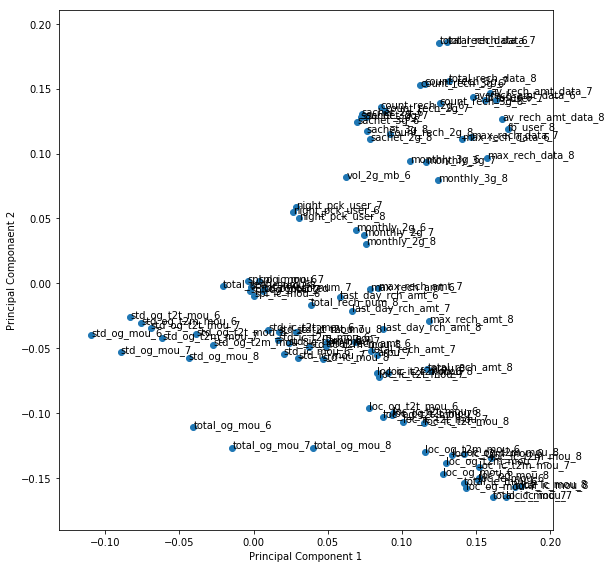

In [684]:
%matplotlib inline
fig = plt.figure(figsize = (8,8))
plt.scatter(pcs_df.PC1, pcs_df.PC2)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Componaent 2')
for i, txt in enumerate(pcs_df.Feature):
    plt.annotate(txt, (pcs_df.PC1[i],pcs_df.PC2[i]))
plt.tight_layout()
plt.show()

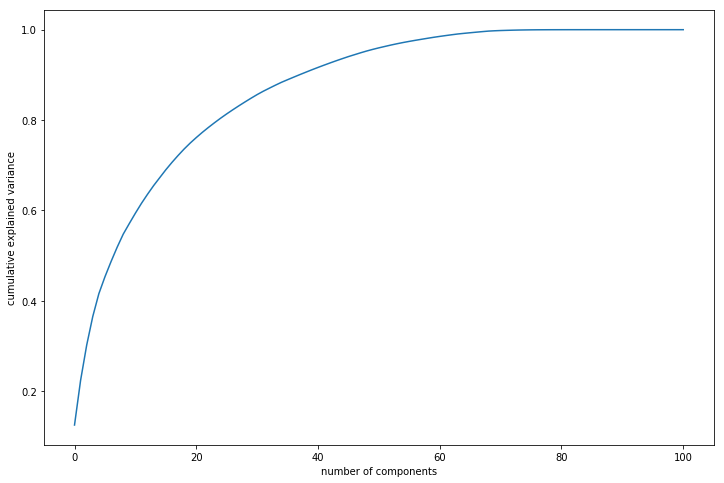

In [685]:
#Making the screeplot - plotting the cumulative variance against the number of components
%matplotlib inline
fig = plt.figure(figsize = (12,8))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

#### Looks like 55 components are enough to describe 95% of the variance in the dataset
- We'll choose 55 components for our modeling

In [686]:
#Using incremental PCA for efficiency - saves a lot of time on larger datasets
from sklearn.decomposition import IncrementalPCA
pca_final = IncrementalPCA(n_components=55)

#### Basis transformation - getting the data onto our PCs

In [687]:
df_train_pca = pca_final.fit_transform(X_train)
df_train_pca.shape

(31987, 55)

#### Creating correlation matrix for the principal components - we expect little to no correlation

In [688]:
#creating correlation matrix for the principal components
corrmat = np.corrcoef(df_train_pca.transpose())

#plotting the correlation matrix
%matplotlib inline
plt.figure(figsize = (160,80))
#sns.heatmap(corrmat,annot = True,cmap="YlGnBu")

<Figure size 11520x5760 with 0 Axes>

<Figure size 11520x5760 with 0 Axes>

In [689]:
#Applying selected components to the test data - 55 components
df_test_pca = pca_final.transform(X_test)
df_test_pca.shape

(13709, 55)

In [690]:
# 1s -> 0s in diagonals
corrmat_nodiag = corrmat - np.diagflat(corrmat.diagonal())
print("max corr:",corrmat_nodiag.max(), ", min corr: ", corrmat_nodiag.min(),)
# we see that correlations are indeed very close to 0

max corr: 0.013800337700913344 , min corr:  -0.02246396802547073


#### Applying a logistic regression on our Principal Components

In [691]:
#Training the model on the train data
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

learner_pca = LogisticRegression(C=1e9)
model_pca = learner_pca.fit(df_train_pca,y_train)

In [692]:
#Making prediction on the test data
pred_probs_test = model_pca.predict_proba(df_test_pca)[:,1]
"{:2.2}".format(metrics.roc_auc_score(y_test, pred_probs_test))

'0.9'

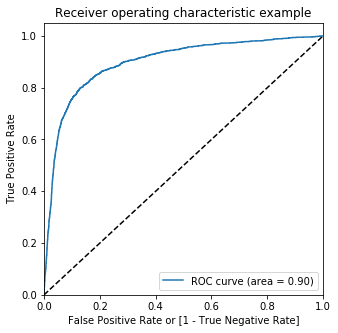

In [693]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

# Calling the function
draw_roc(y_test, pred_probs_test)

In [694]:
# Let's run the model using the selected variables
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
logsk = LogisticRegression(C=1e9)
#logsk.fit(X_train[col], y_train)
logsk.fit(df_train_pca, y_train)

LogisticRegression(C=1000000000.0, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

In [695]:
# Predicted probabilities
y_pred = logsk.predict_proba(df_train_pca)
# Converting y_pred to a dataframe which is an array
y_pred_df = pd.DataFrame(y_pred)
# Converting to column dataframe
y_pred_1 = y_pred_df.iloc[:,[1]]
# Let's see the head
y_pred_1.head()

,1
0,0.000221
1,0.348416
2,0.107861
3,0.443711
4,0.233668


In [696]:
# Converting y_test to dataframe
y_train_df = pd.DataFrame(y_train)
y_train_df.head()

,Churned
61409,0
39951,0
37482,1
87005,1
50196,0


In [697]:
# Putting mobile_number to index
y_train_df['mobile_number'] = cust_train
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_train_df.reset_index(drop=True, inplace=True)
# Appending y_train_df and y_pred_1
y_pred_final = pd.concat([y_train_df,y_pred_1],axis=1)
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 1 : 'Churn_Prob'})
# Rearranging the columns
y_pred_final = y_pred_final.reindex_axis(['mobile_number','Churned','Churn_Prob'], axis=1)
# Let's see the head of y_pred_final
y_pred_final.head()

,mobile_number,Churned,Churn_Prob
0,7001225722,0,0.000221
1,7000031855,0,0.348416
2,7001832093,1,0.107861
3,7000468692,1,0.443711
4,7001254846,0,0.233668


In [698]:
# Creating new column 'predicted' with 1 if Churn_Prob>0.42 else 0
y_pred_final['predicted'] = y_pred_final.Churn_Prob.map( lambda x: 1 if x > 0.42 else 0)
# Let's see the head
y_pred_final.head()

,mobile_number,Churned,Churn_Prob,predicted
0,7001225722,0,0.000221,0
1,7000031855,0,0.348416,0
2,7001832093,1,0.107861,0
3,7000468692,1,0.443711,1
4,7001254846,0,0.233668,0


### Model Evaluation

In [699]:
from sklearn import metrics

In [700]:
# Confusion matrix 
confusion = metrics.confusion_matrix( y_pred_final.Churned, y_pred_final.predicted )
confusion

array([[15819,  3374],
       [ 2162, 10632]], dtype=int64)

In [701]:
# Predicted     Churn  not_churn  __all__
# Actual
# Churn            15819   3374     19193
# not_churn         2162   10632    12794
# __all__          17981   14006    31987

In [702]:
#Let's check the overall accuracy.
metrics.accuracy_score(y_pred_final.Churned, y_pred_final.predicted)

0.8269296901866383

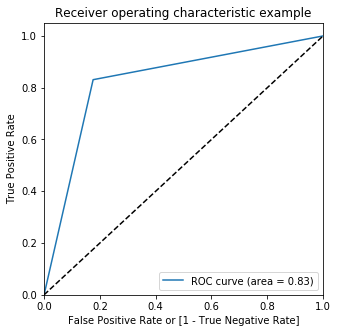

In [703]:
draw_roc(y_pred_final.Churned, y_pred_final.predicted)

In [704]:
#draw_roc(y_pred_final.Churn, y_pred_final.predicted)
"{:2.2f}".format(metrics.roc_auc_score(y_pred_final.Churned, y_pred_final.Churn_Prob))

'0.90'

In [705]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [706]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.8310145380647178

In [707]:
# Let us calculate specificity
TN / float(TN+FP)

0.8242067420413692

In [708]:
# Calculate false postive rate - predicting churn when customer does not have churned
print(FP/ float(TN+FP))

0.17579325795863074


In [709]:
# positive predictive value 
print (TP / float(TP+FP))

0.7591032414679423


In [710]:
# Negative predictive value
print (TN / float(TN+ FN))

0.8797619709693565


### Finding Optimal Cutoff Point
<br>
Optimal cutoff probability is that prob where we get balanced sensitivity and specificity

In [711]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_pred_final[i]= y_pred_final.Churn_Prob.map(lambda x: 1 if x > i else 0)
y_pred_final.head()

,mobile_number,Churned,Churn_Prob,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,7001225722,0,0.000221,0,1,0,0,0,0,0,0,0,0,0
1,7000031855,0,0.348416,0,1,1,1,1,0,0,0,0,0,0
2,7001832093,1,0.107861,0,1,1,0,0,0,0,0,0,0,0
3,7000468692,1,0.443711,1,1,1,1,1,1,0,0,0,0,0
4,7001254846,0,0.233668,0,1,1,1,0,0,0,0,0,0,0


In [712]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_pred_final.Churned, y_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.399975  1.000000  0.000000
0.1   0.1  0.651108  0.957636  0.446777
0.2   0.2  0.739082  0.924340  0.615589
0.3   0.3  0.790446  0.885650  0.726984
0.4   0.4  0.821553  0.840941  0.808628
0.5   0.5  0.838184  0.788416  0.871359
0.6   0.6  0.839560  0.726591  0.914865
0.7   0.7  0.821177  0.632718  0.946804
0.8   0.8  0.754213  0.425043  0.973636
0.9   0.9  0.653453  0.143974  0.993070


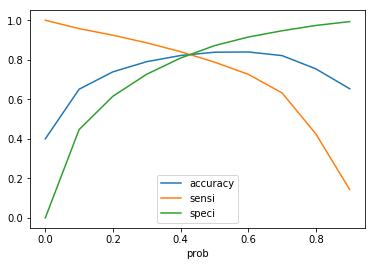

In [713]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

### Our code working good with Train data, will apply the trained model to test data to predict and evaluate.

In [714]:
# Predicted probabilities
y_pred = logsk.predict_proba(df_test_pca)
# Converting y_pred to a dataframe which is an array
y_pred_df = pd.DataFrame(y_pred)
# Converting to column dataframe
y_pred_1 = y_pred_df.iloc[:,[1]]
# Let's see the head
y_pred_1.head()

,1
0,4.705339e-01
1,8.251933e-02
2,2.367705e-01
3,3.043933e-03
4,4.248866e-07


In [715]:
# Converting y_train to dataframe
y_test_df = pd.DataFrame(y_test)
y_test_df.head()

,Churned
54559,1
27257,0
91991,1
86173,0
90871,0


In [716]:
# Putting mobile_number to index
y_test_df['mobile_number'] = cust_test
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)
# Appending y_train_df and y_pred_1
y_pred_final = pd.concat([y_test_df,y_pred_1],axis=1)
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 1 : 'Churn_Prob'})
# Rearranging the columns
y_pred_final = y_pred_final.reindex_axis(['mobile_number','Churned','Churn_Prob'], axis=1)
# Let's see the head of y_pred_final
y_pred_final.head()

,mobile_number,Churned,Churn_Prob
0,7001862884,1,4.705339e-01
1,7000445902,0,8.251933e-02
2,7001271576,1,2.367705e-01
3,7002165446,0,3.043933e-03
4,7001911109,0,4.248866e-07


In [717]:
# Creating new column 'predicted' with 1 if Churn_Prob>0.5 else 0
y_pred_final['predicted'] = y_pred_final.Churn_Prob.map( lambda x: 1 if x > 0.4 else 0)
# Let's see the head
y_pred_final.head()

,mobile_number,Churned,Churn_Prob,predicted
0,7001862884,1,4.705339e-01,1
1,7000445902,0,8.251933e-02,0
2,7001271576,1,2.367705e-01,0
3,7002165446,0,3.043933e-03,0
4,7001911109,0,4.248866e-07,0


In [718]:
# Confusion matrix 
confusion = metrics.confusion_matrix( y_pred_final.Churned, y_pred_final.predicted )
confusion

array([[6724, 1501],
       [ 844, 4640]], dtype=int64)

In [719]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [720]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.8460977388767323

In [721]:
# Let us calculate specificity
TN / float(TN+FP)

0.8175075987841945

<br>
#### Conclusion:
We got a decent model where the prediction works well with around 82% specificity and 90% accuracy both for test and train data.
### Thank you!!!